In [1]:
# -*- coding: utf-8-*-
from bs4 import BeautifulSoup
from selenium import webdriver
from datetime import datetime, date
import time

import pandas as pd
import random
from pandas import Series, DataFrame
from sqlalchemy import create_engine

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc( 'font', family='malgun gothic' ) 

# import mpld3
# mpld3.enable_notebook()

##Google Login후 Trend 접근은 방어로직 대응불가라 판단되어 수작업으로 전환

In [2]:
driver = webdriver.Chrome()
"""
google_id = 'serc20151'
google_pw = 'samsungbest'
"""

"\ngoogle_id = 'serc20151'\ngoogle_pw = 'samsungbest'\n"

In [3]:
google_id = 'serc20151'
google_pw = 'samsungbest'

introURL = 'https://accounts.google.com/ServiceLogin?hl=en-US&continue=https://www.google.com/'
driver.get( introURL )
id_filed = driver.find_element_by_id( 'Email' )
pw_field = driver.find_element_by_id( 'Passwd' )
singIn_button = driver.find_element_by_id( 'signIn' )

id_filed.send_keys( google_id )
pw_field.send_keys( google_pw )
singIn_button.click()

search_field = driver.find_element_by_id( 'lst-ib' )
search_field.send_keys( 'google trend' )

search_button = driver.find_element_by_name( 'btnG' )
sleep_interval = random.randrange( 1, 3 ) # 적절한 interval random화 활용
time.sleep( sleep_interval )
search_button.click()

from selenium.webdriver.common.action_chains import ActionChains

google_trend_explore_text = driver.find_element_by_link_text( 'Explore' )
action = ActionChains( driver )
action.move_to_element( google_trend_explore_text )
action.perform()

google_trend_explore_text.click()

driver.execute_script( 'window.open( "" );' )

In [29]:
# driver.switch_to_window( driver.window_handles[len( driver.window_handles )-1] )
# print driver.current_url

https://www.google.com/trends/explore#q=galaxy%20s6%2C%20galaxy%20s5&date=today%201-m&cmpt=q&tz=


##수집대상 국가목록 정의 : 당사 제품판매 비중 1% 이상 국가들

In [3]:
# 대상 국가 목록
target_nation = [
'',
# 'CN', # 중국은 사실상 의미 없음 : Baidu 활용예정
'US',
'IN',
'BR',
'KR', # 한국은 Naver 대체방안 필요
'DE',
'IT',
'FR',
'ID',
'GB',
'RU',
'SA',
'TR',
'TW',
'ES',
'EG',
'ZA',
'MX',
'AR',
'IR',
'IQ',
'JP',
'SG' ]

##ㆍ참고 : Google Trend Query 구성
1. 기본패턴 : http://www.google.com/trends/explore?hl=en-US#q=galaxy%20s6,%20iphone%206,%20apple%20watch,%20galaxy%20s6%20edge,%20iphone%206%20plus&
2. 언어 : hl=en-US
3. 검색어 : #q=galaxy%20s6,%20iphone%206,%20apple%20watch,%20galaxy%20s6%20edge,%20iphone%206%20plus
3. 기간 : &date=today%203-m
4. 지역 : &geo=BR   
4. ETC : 필수임 (이대로) : &cmpt=q&tz=

##수집 키워드 및 기간 정의

In [4]:
import urllib
# keywords = 'galaxy s5,galaxy s6+galaxy s6 edge,iphone 6'
keywords = 'iphone 6,apple watch'
keyword_params = urllib.quote( keywords )
period_params = 'today%201-m' # 기간은 우선 90로 고정

##국가별 수집 수행

In [5]:
html_result_by_nation_list = []
nation_idx = 0
for nation in target_nation :
    # 기본적인 전달 param을 구성
    targetURL = 'http://www.google.com/trends/explore?hl=en-US#q=' + keyword_params + '&date=' + period_params + '&cmpt=q&tz='
    if nation != '' : # Global이 아닌경우, geo param 전달
        geo_params = '&geo=' + nation 
        targetURL += geo_params
    
    driver.get( targetURL )
    
    sleep_interval = random.randrange( 7, 12 ) # 적절한 interval random화 활용
    time.sleep( sleep_interval )
    
    html = driver.page_source
    soup = BeautifulSoup( html, 'lxml' )

    result = soup.find( 'div', id = 'TIMESERIES_GRAPH_0-time-chart' ).div.div.div.div.table
    html_result_by_nation_list.append( [ nation, result ] )
    nation_idx += 1
    
    print nation, u'완료 (', nation_idx, '/', len( target_nation ), ')'

 완료 ( 1 / 23 )
US 완료 ( 2 / 23 )
IN 완료 ( 3 / 23 )
BR 완료 ( 4 / 23 )
KR 완료 ( 5 / 23 )
DE 완료 ( 6 / 23 )
IT 완료 ( 7 / 23 )
FR 완료 ( 8 / 23 )
ID 완료 ( 9 / 23 )
GB 완료 ( 10 / 23 )
RU 완료 ( 11 / 23 )
SA 완료 ( 12 / 23 )
TR 완료 ( 13 / 23 )
TW 완료 ( 14 / 23 )
ES 완료 ( 15 / 23 )
EG 완료 ( 16 / 23 )
ZA 완료 ( 17 / 23 )
MX 완료 ( 18 / 23 )
AR 완료 ( 19 / 23 )
IR 완료 ( 20 / 23 )
IQ 완료 ( 21 / 23 )
JP 완료 ( 22 / 23 )
SG 완료 ( 23 / 23 )


Global완료
US완료
IN완료
BR완료
KR완료
DE완료
IT완료
FR완료
ID완료
GB완료
RU완료
SA완료
TR완료
TW완료
ES완료
EG완료
ZA완료
MX완료
AR완료
IR완료
IQ완료
JP완료
SG완료


C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


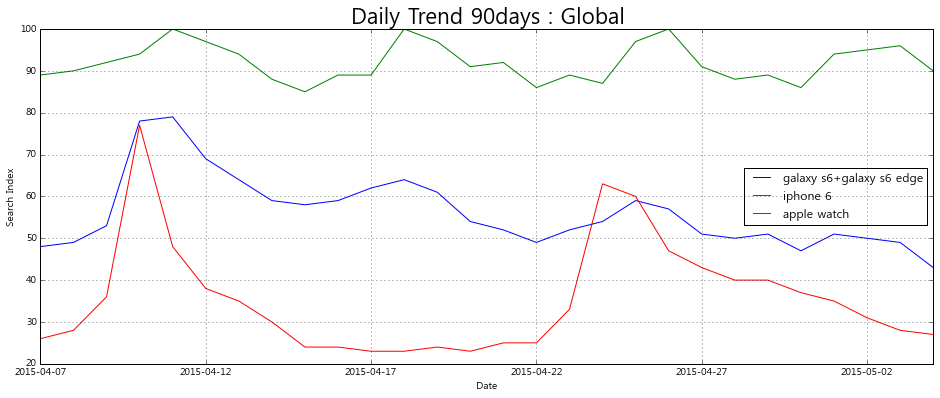

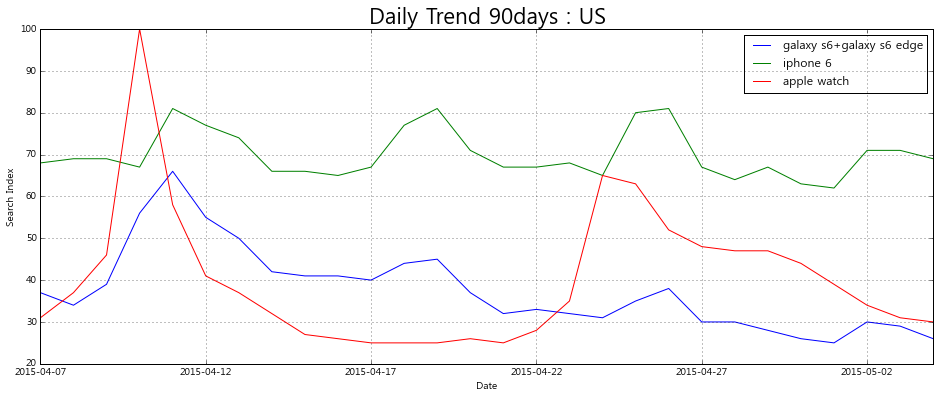

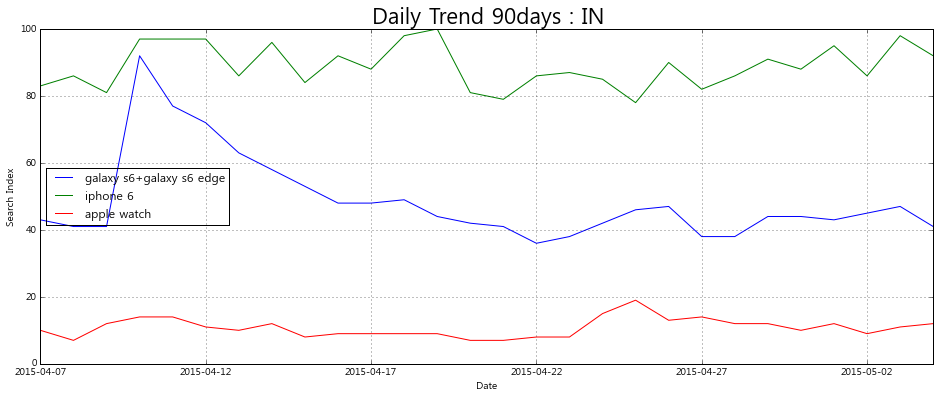

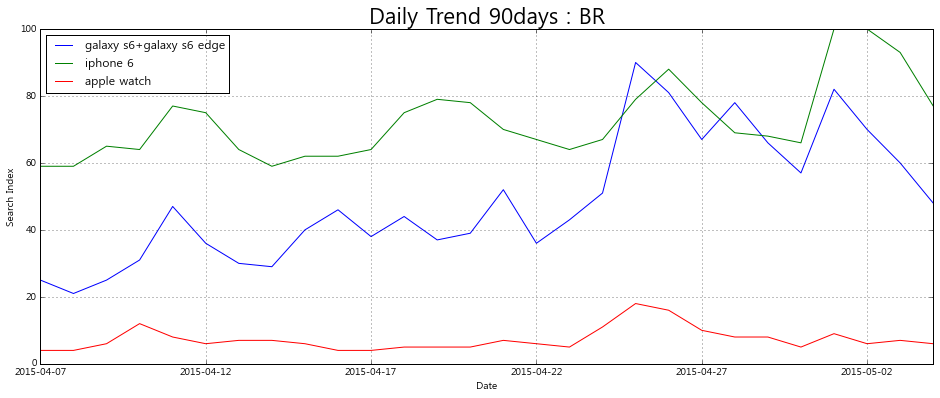

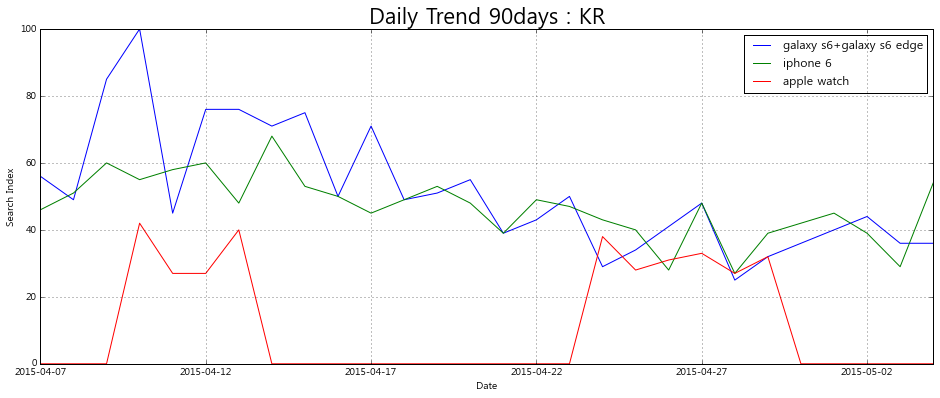

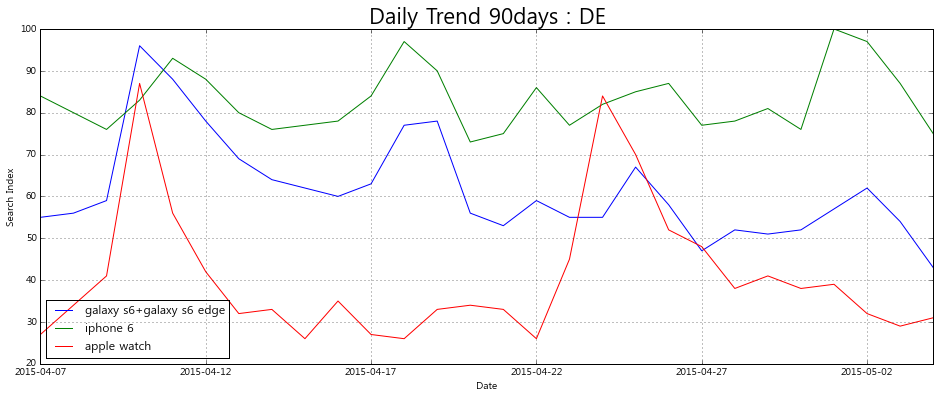

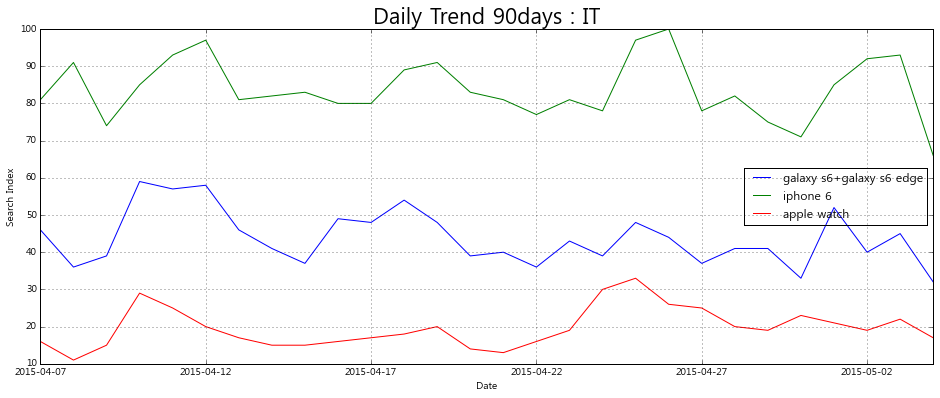

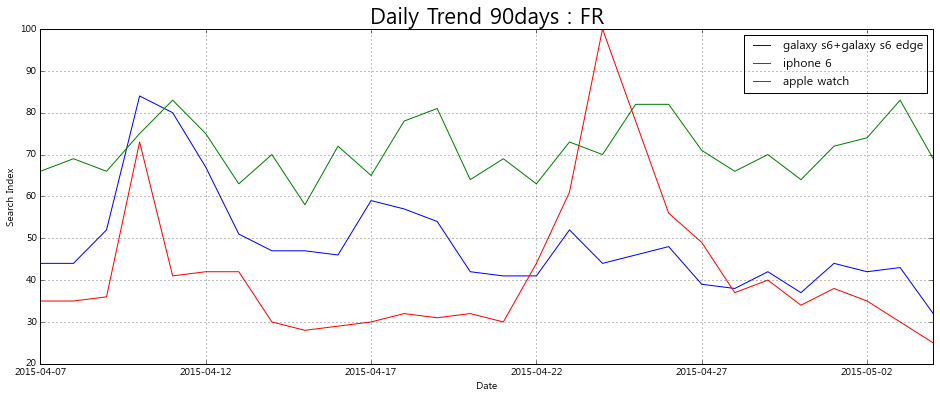

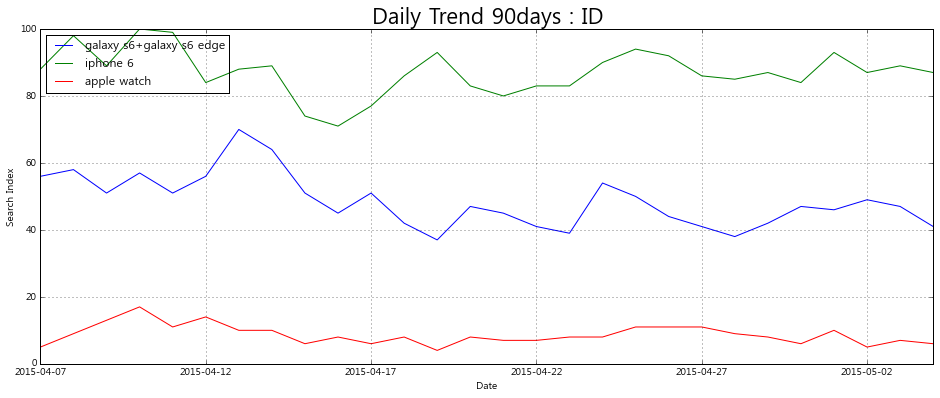

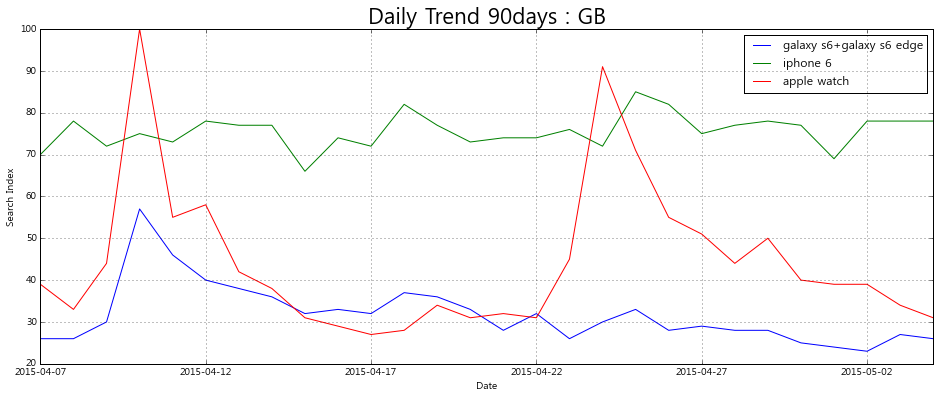

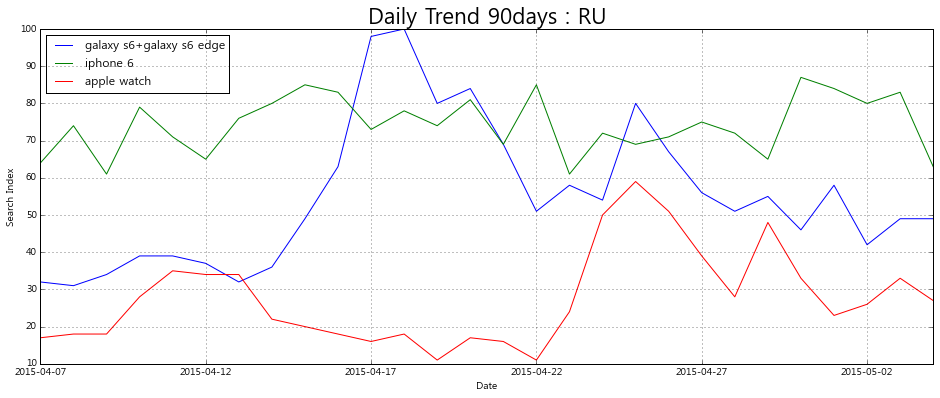

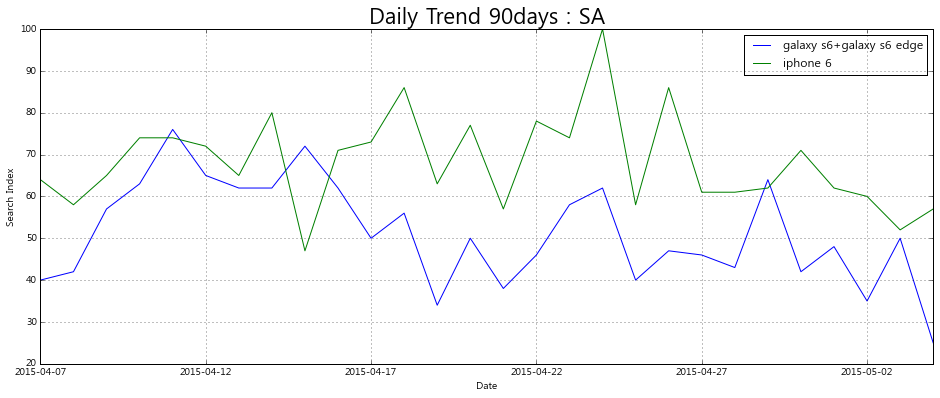

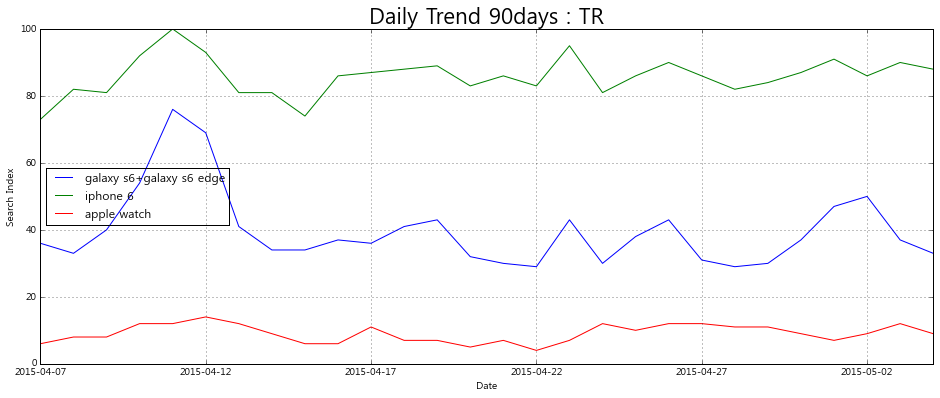

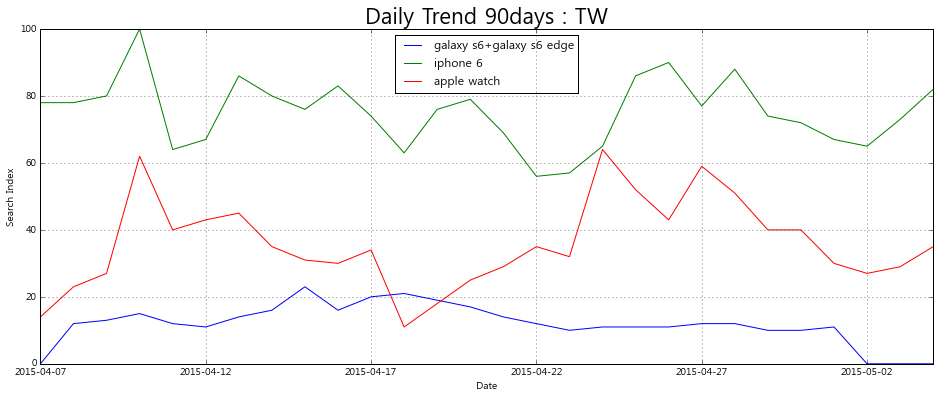

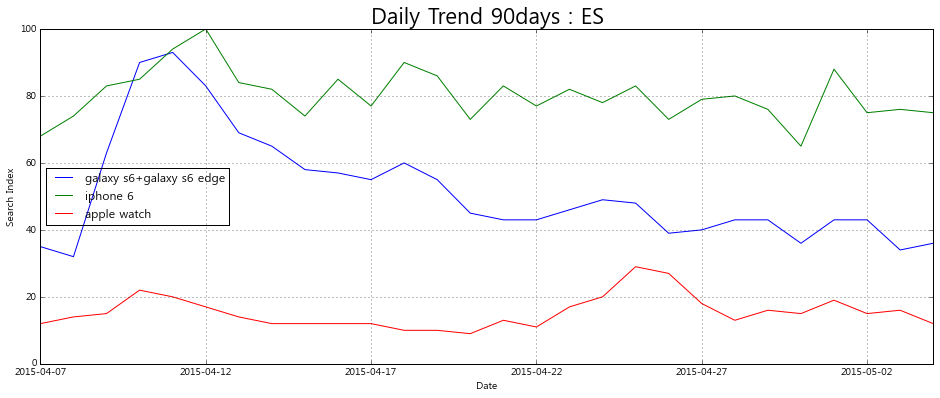

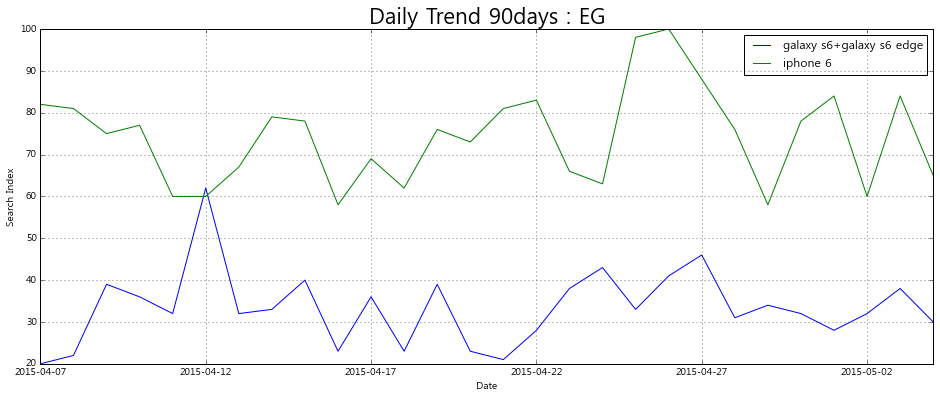

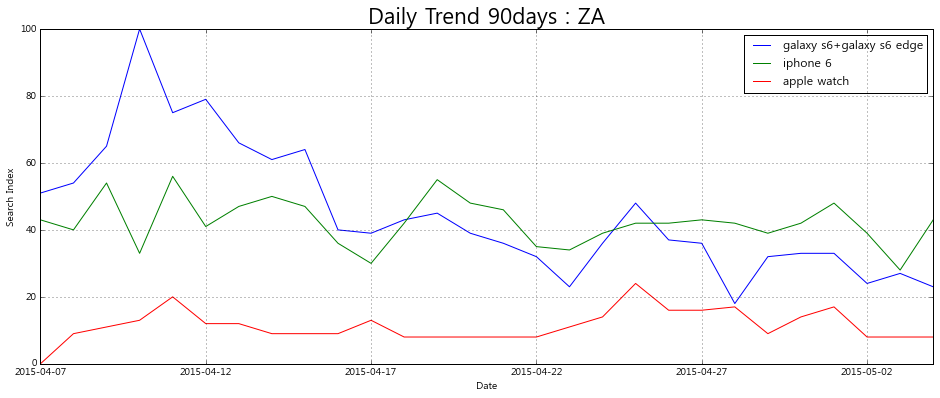

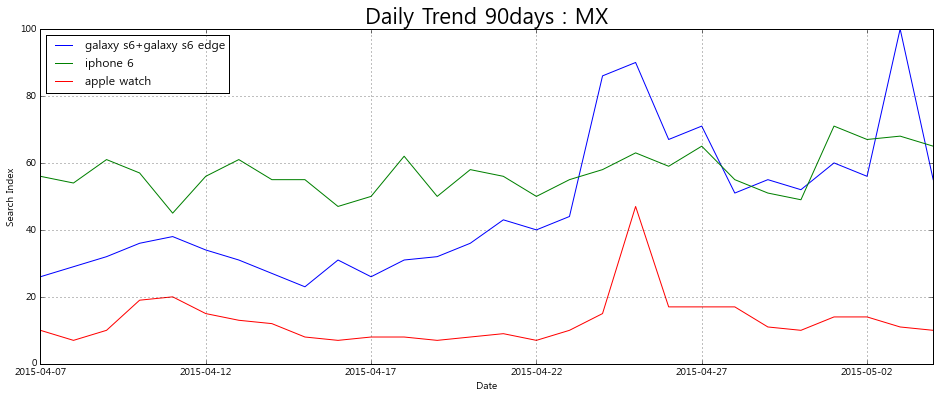

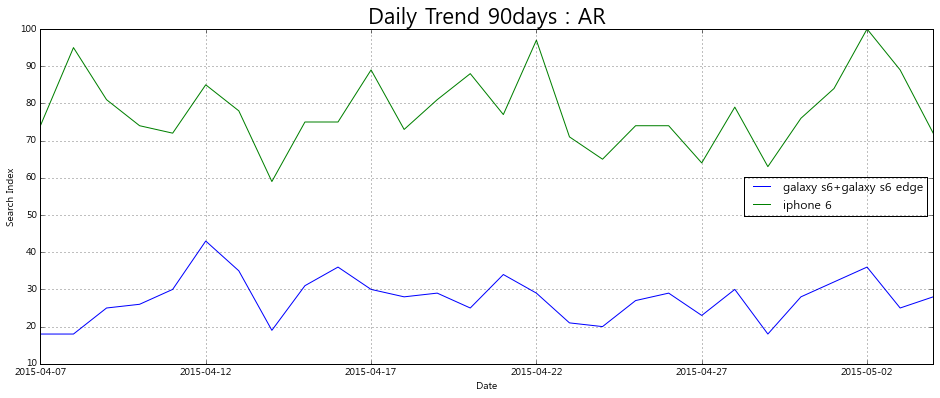

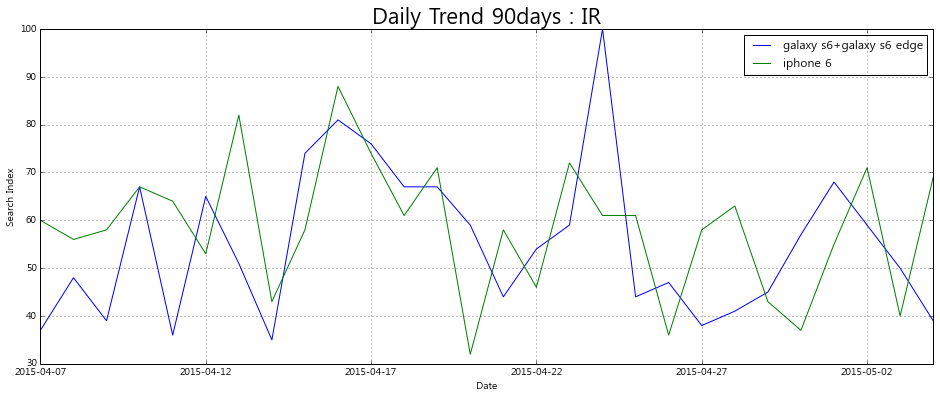

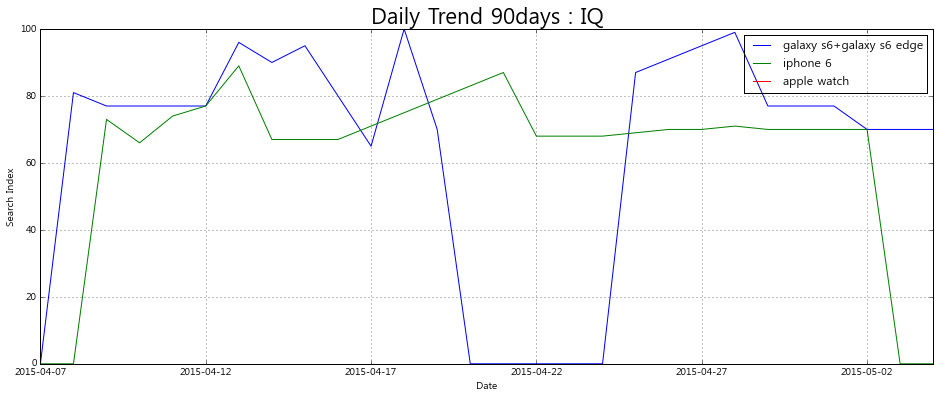

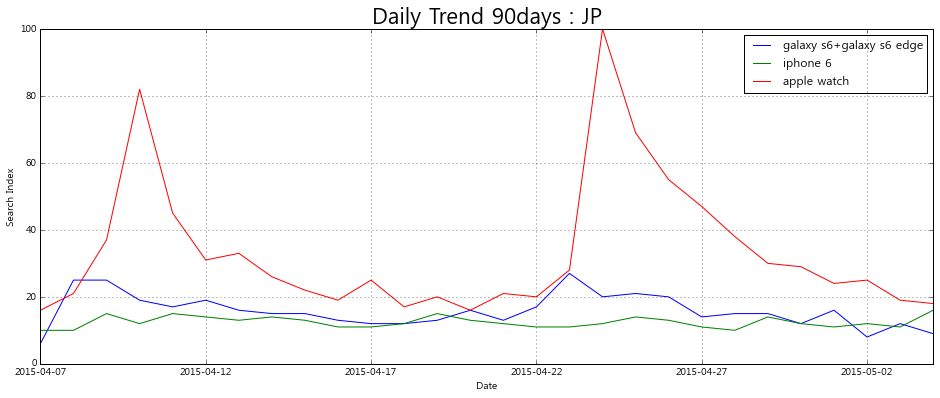

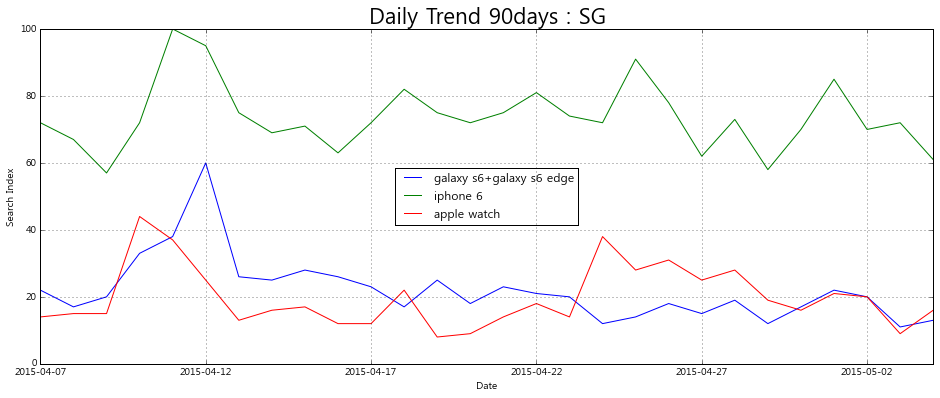

In [6]:
html_result_by_nation_list

for result_with_nation in html_result_by_nation_list :
    nation = result_with_nation[0]
    result = result_with_nation[1]

    if nation == '' :
        nation = 'Global'    # Global name 제공
    
    if nation == 'CN' :    # 중국의 경우는 search volume 이슈로 인해 비정상적 data 발생
        continue
    
    workable = True
    
    ths = result.find_all( 'th' )

    column_list = []
    for th in ths :
        column_list.append( th.text )

    df = pd.DataFrame( columns = column_list )

    trs = result.tbody.find_all( 'tr' )
    date_idx = 0
    size = len( trs )

    for tr in trs :
        if date_idx >= size - 2 :    # 최종일 2일은 의미없는 data이므로 중지한다
            break
        date_idx += 1
        
        tds = tr.find_all( 'td' )
        tmp_list = []
        for td in tds :
            td_str = td.text.encode("utf-8")  # unicode를 string 변환처리
            str = ''

            if len( td_str ) > 3 :
                try :
                    split_list = td_str.split( ',' )
                    idx = 0
                    for split in split_list :
                        if idx != 0 :
                            str += split
                        idx += 1
                    str = datetime.strftime( datetime.strptime( str.lstrip().rstrip(), '%B %d %Y' ), '%Y-%m-%d' )
                    tmp_list.append( str )
                except :
                    workable = False
                    break    
            else :
                str = td_str
                if len( str ) > 0 :
                    value = int( str )
                else :
                    value = 0
                tmp_list.append( value )
        
        if workable == False :
            break
        
        df_tmp = pd.DataFrame( [ tmp_list ], columns = column_list )

        df = df.append( df_tmp )

    if workable == False :
        continue
        
    date_prefix_str = datetime.today().strftime( '%Y.%m.%d %H.%I' )[2:]
    
    df.to_csv( './output/raw_data/' + date_prefix_str + '_' + nation + '_' + keywords + '_' + 'result.txt', sep = '\t' )

    # Line Chart
    ax = df.plot( kind = 'line', x = 'Date', y = column_list[1:], figsize = ( 16, 6 ), legend = True, linewidth = 1, antialiased = True )

    # x, y축 label
    #     ax.set_xticklabels( xtick_label_data, fontsize = 12, rotation = 'horizontal' )
    ax.set_ylabel( u'Search Index' )
    ax.set_xlabel( u'Date' )

    # Title 및 각종 annotation
    ax.set_title( u'Daily Trend 90days : ' + nation, fontdict = { 'fontsize' : 22 } )  
    plt.savefig( './output/line_chart/' + nation + '.png' )
    print nation + u'완료'